In [1]:
import pandas as pd
import numpy as np

from sklearn import set_config
from sklearn.metrics import mean_squared_error
set_config(transform_output="pandas")

pd.set_option('mode.chained_assignment', None)
pd.options.display.max_rows = 1000

%matplotlib inline


def calc_metrics(submission, dtypes=["train", "test"]):
    result = {}
    for dtype in dtypes:
        name = f"MSE_{dtype}"
        mse = None
        sample = submission[submission["type"] == dtype]
        if not sample["rating"].isnull().all():
            mse = mean_squared_error(sample["rating"], sample["predict_rating"])

        result[name] = mse

    return result

In [2]:
# Your Name Surname
# !!! Please do not change the NAME in other hypotheses
NAME = "Belton_Manhica"

train_and_test = pd.read_csv(f"0_{NAME}.csv")

# split dataset for train and test part
train = train_and_test[train_and_test["type"] == "train"]
test = train_and_test[train_and_test["type"] == "test"]
train_and_test.shape, train.shape, test.shape

((10000, 3), (5000, 3), (5000, 3))

In [4]:
train_and_test.sample(5)

,comment,rating,type
5152,Super silly game but it 's a great light game ...,NaN,test
4905,Negotiation part balances out the unbalanced a...,10.0,train
3109,One of my wife 's all time favorite games . It...,8.0,train
2116,A truly impressive fantasy dungeon-crawler in ...,9.0,train
1919,"Very easy to play , but by itself is extremely...",5.0,train


In [17]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#split the data into train and validation sets
from sklearn.model_selection import train_test_split

train_, valid  = train_test_split(train, test_size= 0.5, random_state= 42 )

train_.shape, valid.shape

((2500, 3), (2500, 3))

In [5]:
train_.head(5)

,comment,rating,type
1840,I think this game has surpased Puerto Rica as ...,8.0,train
2115,2-5p . This themey game can be a special kind ...,8.0,train
4437,"OK , the first couple games were rather bewild...",6.0,train
1146,The simple rules and quick setup make this a g...,7.0,train
2486,What a great <UNK> . Finally got to play it a ...,8.5,train


In [4]:
#select the feature vector
X_train_and_test = train_and_test['comment']
X_train = train['comment']
X_train_ = train_['comment']
X_valid = valid['comment']
X_test = test['comment']

#select the target vector
y_train_and_test = train_and_test['rating']
y_train = train['rating']
y_train_ = train_['rating']
y_valid = valid['rating']
y_test = test['rating']

In [5]:
#get a list of train and validation sets
get_X_y = [
    ('train', X_train_, train_),
    ('valid', X_valid, valid)
]

In [7]:
#inicialize the pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


#inicialize pipeline
reg = Pipeline([
    ('vectorizer', TfidfVectorizer(use_idf = True,
                                   stop_words= 'english',
                                   lowercase=True,
                                   max_df=0.67,
                                   ngram_range=(1, 3),
                                   max_features=5000,
                                   min_df=3
                                   )),
    ('linear_reg', LinearRegression())
])



In [8]:
#fit the model and make predictons

#select the train set
name, X_, y_ = get_X_y[0]

#fit the model
reg.fit(X_,y_['rating'])

#make predictions
for name, X_, y_ in get_X_y:
    predicted = reg.predict(X_)
    #eiminate negative values
    predicted[predicted<0]=0
    #limite perdiction values to 10
    predicted[predicted>10]=10
    #add predictions to the dataset
    y_['Predicted_rating'] = predicted

    #print scores
    score_reg = mean_squared_error(y_true= y_['rating'], y_pred=y_['Predicted_rating'])
    print(f'{name}: {score_reg}')


train: 0.004736000007651502
valid: 5.307886572378622


In [9]:
#cross validation score
from sklearn.model_selection import cross_val_score

CV_score = cross_val_score(reg, X_, y_['rating'], scoring='neg_mean_squared_error', cv=5)
mean_CVscore = np.mean(CV_score)
mean_CVscore


np.float64(-5.979213961454205)

In [10]:
name, X_, y_ = get_X_y[0]

#acess the vectorizer
tfdif_vec = reg.named_steps['vectorizer']

trans_tfdif_vec = tfdif_vec.transform(X_)

#get feature names
feature_names = tfdif_vec.get_feature_names_out()

#create a dataframe
tfdif_vec_df = pd.DataFrame(trans_tfdif_vec.todense(), columns = feature_names)

In [11]:
#create a data frame for word importances
idf_scores_df = pd.DataFrame(tfdif_vec.idf_, feature_names)
#rename the columns
idf_scores_df.columns =['Importance']

#print values in descending order of importance
idf_scores_df.sort_values(by =['Importance'], ascending= False)

,Importance
és,7.438152
03,7.438152
07,7.438152
08,7.438152
xd,7.438152
...,...
played,2.762989
unk,2.712979
like,2.652745
fun,2.529180


In [12]:
idf_scores_df.sort_values(by =['Importance'], ascending= False).head(100)

,Importance
és,7.438152
03,7.438152
07,7.438152
08,7.438152
xd,7.438152
www boardgamegeek com,7.438152
www boardgamegeek,7.438152
wrapped,7.438152
worthy,7.438152
worried,7.438152


Lasso

In [13]:
#Lasso
from sklearn.linear_model import Lasso

reg_lasso = Pipeline([
    ('vectorizer', TfidfVectorizer(use_idf = True,
                                   stop_words= 'english',
                                   lowercase=True,
                                   max_df=0.67,
                                   ngram_range=(1, 2),
                                   max_features=5000,
                                   min_df=3)),
    ('linear_reg', Lasso())
])

#select the training set
name, X_, y_ = get_X_y[0]

#fit the model
reg_lasso.fit(X_, y_['rating'])

#make predictions
for name, X_, y_ in get_X_y:
    pred_lasso = reg_lasso.predict(X_)
    pred_lasso[pred_lasso<0]=0
    pred_lasso[pred_lasso>10]=10
    y_['pred_lasso']= pred_lasso

    #print scores
    score_lasso = mean_squared_error(y_true= y_['rating'], y_pred=y_['pred_lasso'])
    print(f'{name}: {score_lasso:.4f}')



train: 2.9404
valid: 2.9634


In [21]:
#Hyperparameter tunning

#create a dictionary to save the results
MSE = {'train': [], 'valid': []}

#create a list for to store alpha values
alpha = []

#transform the data
vec_ = TfidfVectorizer(use_idf = True,
                                   stop_words= 'english',
                                   lowercase=True,
                                   max_df=0.8,
                                   ngram_range=(1, 2),
                                   max_features=5000,
                                   min_df=1)
vec_train = vec_.fit_transform(X_train_)
vec_valid= vec_.transform(X_valid)

for k in [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-6,1e-5,1e-4,1e-3,1e-2]:

  #print alpha values and add them to the list
  print('Alpha:', k)
  alpha.append(k)

  reg_lasso_ = Lasso(alpha= k)

  #fit the model
  reg_lasso_.fit(vec_train,y_train_)

  #make predictions for the training set
  result_train = reg_lasso_.predict(vec_train)
  result_train[result_train<0]=0
  result_train[result_train>10]=10
  #get the score and store it
  score_train = mean_squared_error(y_true= y_train_ , y_pred= result_train)
  MSE['train'].append(score_train)

  #make predictions for the validation set
  result_valid = reg_lasso_.predict(vec_valid)
  result_valid[result_valid<0]=0
  result_valid[result_valid>10]=10
  #get the score and store it
  score_valid = mean_squared_error(y_true= y_valid , y_pred= result_valid)
  MSE['valid'].append(score_valid)

  #print the scores
  print(f'train: {score_train:.4f}')
  print(f'valid: {score_valid:.4f}')
  print('\n')


Alpha: 1e-15
train: 0.0013
valid: 4.9027


Alpha: 1e-14
train: 0.0013
valid: 4.9027


Alpha: 1e-13
train: 0.0013
valid: 4.9027


Alpha: 1e-12
train: 0.0013
valid: 4.9027


Alpha: 1e-11
train: 0.0013
valid: 4.9026


Alpha: 1e-10
train: 0.0013
valid: 4.9019


Alpha: 1e-09
train: 0.0013
valid: 4.8947


Alpha: 1e-08
train: 0.0013
valid: 4.8273


Alpha: 1e-07
train: 0.0013
valid: 4.4998


Alpha: 1e-06
train: 0.0014
valid: 4.5426


Alpha: 1e-06
train: 0.0014
valid: 4.5426


Alpha: 1e-05
train: 0.0056
valid: 4.5437


Alpha: 0.0001
train: 0.2346
valid: 3.3842


Alpha: 0.001
train: 1.9954
valid: 2.5280


Alpha: 0.01
train: 2.9065
valid: 2.9378




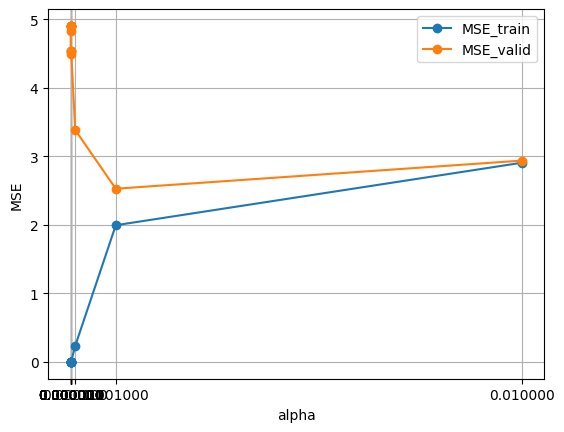

In [22]:
#plot the scores vs the alpha value
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(alpha,MSE['train'], label = 'MSE_train', marker = 'o')
plt.plot(alpha,MSE['valid'], label = 'MSE_valid', marker = 'o')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(alpha)
plt.grid()
plt.legend()
plt.show()

In [19]:
#hyperparameter tunning
from sklearn.model_selection import GridSearchCV

name, X_, y_ = get_X_y[0]
alpha_val = {'linear_reg__alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
grid_search_lasso = GridSearchCV(reg_lasso, alpha_val, scoring = 'neg_mean_squared_error', cv = 5, verbose = 0)
grid_search_lasso.fit(X_, y_['rating'])

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.221099047876624, tolerance: 0.8271385201107145
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.947761291231663, tolerance: 0.8227026177678567
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.933539799427766, tolerance: 0.8358932851107146
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: Con

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(max_df=0.67,
                                                        max_features=5000,
                                                        min_df=3,
                                                        ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('linear_reg', Lasso())]),
             param_grid={'linear_reg__alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01,
                                               1, 5, 10, 20, 30, 35, 40, 45, 50,
                                               55, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [20]:
print('The best alpha is:', grid_search_lasso.best_params_)
print('The best score is:', grid_search_lasso.best_score_)

The best alpha is: {'linear_reg__alpha': 0.001}
The best score is: -2.473996900188678


In [23]:
#fit the model with the best alpha

reg_lasso_best = Pipeline([
    ('vectorizer', TfidfVectorizer(use_idf = True,
                                   stop_words= 'english',
                                   lowercase=True,
                                   max_df=0.67,
                                   ngram_range=(1, 3),
                                   max_features=1000,
                                   min_df=3)),
    ('linear_reg', Lasso(alpha=0.001))
])

#select the training set
name, X_, y_ = get_X_y[0]

#fit the model
reg_lasso_best.fit(X_, y_['rating'])

#make predictions
for name, X_, y_ in get_X_y:
    pred_lasso_best = reg_lasso_best.predict(X_)
    pred_lasso_best[pred_lasso_best<0] = 0
    pred_lasso_best[pred_lasso_best>10] = 10
    y_['pred_lasso_best']= pred_lasso_best

    #print scores
    score_lasso_best = mean_squared_error(y_true= y_['rating'], y_pred=y_['pred_lasso_best'])
    print(f'{name}: {score_lasso_best:.4f}')



train: 1.9109
valid: 2.5200


Ridge

In [24]:
#Ridge
from sklearn.linear_model import Ridge

reg_ridge = Pipeline([
    ('vectorizer', TfidfVectorizer(use_idf = True,
                                   stop_words= 'english',
                                   lowercase=True,
                                   max_df=0.8,
                                   ngram_range=(1, 3),
                                   max_features=5000,
                                   min_df=3)),
    ('linear_reg', Ridge())
])

#select the training set
name, X_, y_ = get_X_y[0]

#fit the model
reg_ridge.fit(X_, y_['rating'])

#make predictions
for name, X_, y_ in get_X_y:
    pred_ridge = reg_ridge.predict(X_)
    pred_ridge[pred_ridge<0]
    y_['pred_ridge']= pred_ridge

    #print scores
    score_ridge = mean_squared_error(y_true= y_['rating'], y_pred=y_['pred_ridge'])
    print(f'{name}: {score_ridge:.4f}')



train: 0.9716
valid: 2.4571


In [20]:
#hyperparameter tunning with gridsearch
from sklearn.model_selection import GridSearchCV

name, X_, y_ = get_X_y[0]
alpha_val = {'linear_reg__alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
grid_search_ridge = GridSearchCV(reg_ridge, alpha_val, scoring = 'neg_mean_squared_error', cv = 5)
grid_search_ridge.fit(X_, y_['rating'])

print('The best alpha is:', grid_search_ridge.best_params_)
print('The best score is:', grid_search_ridge.best_score_)


The best alpha is: {'linear_reg__alpha': 1}
The best score is: -2.4371193809160285


In [176]:
#hyperparaemter tunning

#create a dictionary to save the results
MSE = {'train': [], 'valid': []}

#create a list for to store alpha values
alpha = []

#transform the data
vec_ = TfidfVectorizer(use_idf = True, stop_words= 'english')
vec_train = vec_.fit_transform(X_train_)
vec_valid= vec_.transform(X_valid)

for k in [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,80,100]:

  #print alpha values and add them to the list
  print('Alpha:', k)
  alpha.append(k)

  reg_ridge_ = Ridge(alpha= k)

  #fit the model
  reg_ridge_.fit(vec_train,y_train_)

  #make predictions for the training set
  result_train = reg_ridge_.predict(vec_train)
  result_train[result_train<0]=0
  #get the score and store it
  score_train = mean_squared_error(y_true= y_train_ , y_pred= result_train)
  MSE['train'].append(score_train)

  #make predictions for the validation set
  result_valid = reg_ridge_.predict(vec_valid)
  result_valid[result_valid<0]=0
  #get the score and store it
  score_valid = mean_squared_error(y_true= y_valid , y_pred= result_valid)
  MSE['valid'].append(score_valid)

  #print the scores
  print(f'train: {score_train:.4f}')
  print(f'valid: {score_valid:.4f}')
  print('\n')


Alpha: 1e-15
train: 0.0000
valid: 4.2545


Alpha: 1e-10
train: 0.0000
valid: 4.2545


Alpha: 1e-08
train: 0.0000
valid: 4.2545


Alpha: 0.001
train: 0.0001
valid: 4.2090


Alpha: 0.01
train: 0.0049
valid: 3.9070


Alpha: 1
train: 0.9304
valid: 2.4525


Alpha: 5
train: 1.8350
valid: 2.4828


Alpha: 10
train: 2.1810
valid: 2.5866


Alpha: 20
train: 2.4585
valid: 2.7024


Alpha: 30
train: 2.5843
valid: 2.7638


Alpha: 35
train: 2.6251
valid: 2.7848


Alpha: 40
train: 2.6573
valid: 2.8018


Alpha: 45
train: 2.6835
valid: 2.8158


Alpha: 50
train: 2.7053
valid: 2.8276


Alpha: 55
train: 2.7236
valid: 2.8376


Alpha: 60
train: 2.7392
valid: 2.8463


Alpha: 80
train: 2.7842
valid: 2.8715


Alpha: 100
train: 2.8128
valid: 2.8878




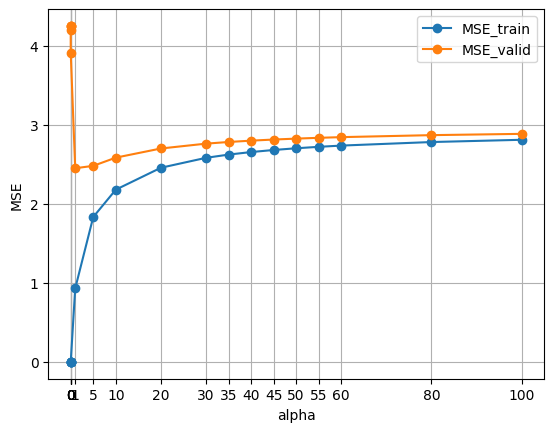

In [177]:
#plot the scores vs the alpha value
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(alpha,MSE['train'], label = 'MSE_train', marker = 'o')
plt.plot(alpha,MSE['valid'], label = 'MSE_valid', marker = 'o')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(alpha)
plt.grid()
plt.legend()
plt.show()


In [168]:
#Ridge
from sklearn.linear_model import Ridge


reg_ridge_best = Pipeline([
    ('vectorizer', TfidfVectorizer(use_idf = True,
                                   stop_words= None,
                                   lowercase=True,
                                   max_df=0.67,
                                   ngram_range=(1, 3),
                                   max_features=5000,
                                   min_df=3)),
    ('linear_reg', Ridge(alpha= 2.3))
])

#select the training set
name, X_, y_ = get_X_y[0]

#fit the model
reg_ridge_best.fit(X_, y_['rating'])

#make predictions
for name, X_, y_ in get_X_y:
    pred_ridge_best = reg_ridge_best.predict(X_)
    pred_ridge_best[pred_ridge_best<0]=0
    pred_ridge_best[pred_ridge_best>10]=10
    y_['pred_ridge_best']= pred_ridge_best

    #print scores
    score_ridge_best = mean_squared_error(y_true= y_['rating'], y_pred=y_['pred_ridge_best'])
    print(f'{name}: {score_ridge_best:.4f}')



train: 1.3982
valid: 2.3451


Feature selection

In [137]:
name, X_, y_ = get_X_y[0]

#acess the vectorizer
vec_ridge = reg_ridge_best.named_steps['vectorizer']
feature_name = vec_ridge.get_feature_names_out()

vec_trans = vec_ridge.transform(X_)
vec_ridge_terms = vec_ridge.idf_

len(vec_ridge_terms)

5000

In [138]:
#feature selection
ridge_extracted = reg_ridge_best.named_steps['linear_reg']

#exctact coeficients
ridge_coef = pd.DataFrame(ridge_extracted.coef_.tolist(),index =feature_name)

#rename columns
ridge_coef.columns = ['coef']

ridge_coefficients = ridge_coef.sort_values(by =['coef'], ascending = False)
ridge_coefficients


,coef
great,2.566081
love,2.476830
amazing,1.873465
fantastic,1.737276
awesome,1.684153
...,...
who,-1.611413
terrible,-1.686951
too,-1.694888
not,-2.052076


In [139]:
#select best features
extract_features = ridge_coefficients[ridge_coef['coef'] > 0]
best_features =extract_features.index.tolist()

print('The total number of features selected is',len(best_features))

#create a vocabulary of top features/ words
voc = best_features


The total number of features selected is 2585


In [140]:
#fit a model with the most important features
#Ridge
from sklearn.linear_model import Ridge


reg_ridge_best = Pipeline([
    ('vectorizer', TfidfVectorizer(use_idf = True,
                                   vocabulary = voc,
                                   stop_words = 'english',
                                   lowercase=True,
                                   max_df=0.67,
                                   ngram_range=(1, 3),
                                   max_features=5000,
                                   min_df=3)),
    ('linear_reg', Ridge(alpha= 2.4))
])

#select the training set
name, X_, y_ = get_X_y[0]

#fit the model
reg_ridge_best.fit(X_, y_['rating'])

#make predictions
for name, X_, y_ in get_X_y:
    pred_ridge_best = reg_ridge_best.predict(X_)
    pred_ridge_best[pred_ridge_best<0]=0
    pred_ridge_best[pred_ridge_best>10]=10
    y_['pred_ridge_best']= pred_ridge_best

    #print scores
    score_ridge_best = mean_squared_error(y_true= y_['rating'], y_pred=y_['pred_ridge_best'])
    print(f'{name}: {score_ridge_best:.4f}')




train: 2.0763
valid: 2.6395


Dimension reduction

In [141]:
#import PCA
from sklearn.decomposition import PCA

#inicialize pca
pca = PCA(random_state=42, n_components= 1825)

#select proper dataset fot the pca
df = pd.DataFrame(vec_trans.todense(), columns= feature_name)

data_pca = pd.DataFrame(pca.fit_transform(df))

#get the culmulative of variance explained by the pca
explained_variance = pca.explained_variance_ratio_
explained_variance = explained_variance.cumsum()

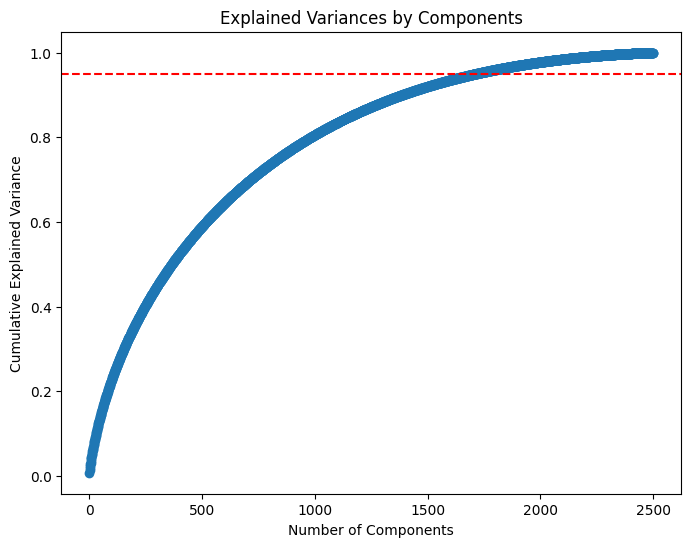

In [44]:
# plot the Cumulative explaines_variance vs number of components
plt.figure(figsize = (8,6))
plt.plot(range(1,len(explained_variance)+1), explained_variance, marker = 'o')
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label = '95% variance')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

Comment: according to the PCA, 1600-1850 components explain 95% of variance in the data. Note(we fit the model with all components then based on the graph we selected 1600-1850)


In [142]:
#fit the model with pca features
ridge_pca = Ridge(5)
ridge_pca.fit(data_pca, y_train_)
predict_pca = ridge_pca.predict(data_pca)
predict_pca[predict_pca<0]=0
predict_pca[predict_pca>10]=10
score_ridge_pca = mean_squared_error(y_true=y_train_, y_pred=predict_pca)
print(f'train: {score_ridge_pca:.4f}')

train: 1.7986


In [132]:
#pca for the validation data
vec_trans_valid = vec_ridge.transform(X_valid)

#select proper dataset fot the pca
df_ = pd.DataFrame(vec_trans_valid.todense(), columns= feature_name)

data_pca_ = pd.DataFrame(pca.transform(df_))

#get the culmulative of variance explained by the pca
explained_variance_ = pca.explained_variance_ratio_
explained_variance_ = explained_variance_.cumsum()

predict_pca_ = ridge_pca.predict(data_pca_)
predict_pca_[predict_pca_<0] =0
predict_pca_[predict_pca_>10] =10
score_ridge_pca_ = mean_squared_error(y_true=y_valid, y_pred=predict_pca_)
print(f'valid: {score_ridge_pca_:.4f}')


valid: 2.4119


Train the model on the whole dataset

In [173]:
reg_final = Pipeline([
    ('vectorizer', TfidfVectorizer(use_idf = True,
                                   stop_words= None,
                                   lowercase=True,
                                   max_df=0.67,
                                   ngram_range=(1, 3),
                                   max_features=5000,
                                   min_df=3)),
    ('pca', PCA(random_state =42, n_components=1825)),
    ('linear_reg', Ridge(alpha = 2.3))
])

reg_final.fit(train_and_test[train_and_test['type']== 'train']['comment'],
              train_and_test[train_and_test['type']== 'train']['rating'])


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.67, max_features=5000, min_df=3,
                                 ngram_range=(1, 3))),
                ('pca', PCA(n_components=1825, random_state=42)),
                ('linear_reg', Ridge(alpha=2.3))])

In [174]:
#make predictions
train_pred = reg_final.predict(train_and_test[train_and_test['type']== 'train']['comment'])
test_pred = reg_final.predict(train_and_test[train_and_test['type']== 'test']['comment'])

#eliminate negative predictions
train_pred[train_pred<0] =0
test_pred[test_pred<0] = 0

#eliminate predictions greater than 10
train_pred[train_pred>10] =10
test_pred[test_pred>10] = 10


#add the predictions to the dataset
train_and_test['predict_rating'] = None
train_and_test.loc[train_and_test['type']== 'train','predict_rating'] = train_pred
train_and_test.loc[train_and_test['type']== 'test','predict_rating'] = test_pred

#print scores
score_train_all = calc_metrics(train_and_test, dtypes=['train'])

print(score_train_all)

{'MSE_train': 1.5760577743867428}


In [109]:
train_and_test.sample(10)

,comment,rating,type,predict_rating
5898,Too long of a game with not enough epic feelin...,NaN,test,6.403781
1675,"As hard to beat as The Grizzled , but takes mu...",7.0,train,7.484516
8829,A jack of all trades but a master of none . 3r...,NaN,test,6.593024
2126,For worker placement / resource management gam...,7.9,train,7.151118
5161,I love this game because of the level of plann...,NaN,test,8.209254
9001,"I played it once , and like it enough that I w...",NaN,test,5.98991
8305,Really <UNK> a very fun game . However <UNK> w...,NaN,test,7.6337
5322,Did n't think I was going to like this game at...,NaN,test,6.19832
6678,works extremely well for mixed age groups that...,NaN,test,7.454353
7325,A fun abstract game for two players . Plays qu...,NaN,test,7.523835


# Final checks and prepare submission

In [175]:
if train_and_test.shape[0] != 10000:
    raise ValueError(f'Incorrect train_and_test file shape should be a 10000. {train_and_test.shape[0]} are given')

if "predict_rating" not in train_and_test.columns:
    raise ValueError(f'Column "predict_rating" should be in train_and_test dataset')

if train_and_test["predict_rating"].isnull().sum() > 0:
    raise ValueError(f'Column "predict_rating" have null values')

if (train_and_test["predict_rating"] < 0.).sum() > 0:
    raise ValueError(f'Column "predict_rating" contain negative values')

if (train_and_test["predict_rating"] > 10.).sum() > 0:
    raise ValueError(f'Column "predict_rating" contain values more than 10.')

train_and_test[["predict_rating"]].to_csv(f'1_{NAME}.csv', index=False)